In [2]:
import sympy
sympy.init_printing()

## GENERIC formulation

$$
		\begin{bmatrix}
			\dot{q} \\
			\dot{p} \\
			\dot{s}_1 \\
			\dot{s}_2
		\end{bmatrix}
		\: = \:
		\begin{bmatrix}
			0 && 1 && 0 && 0 \\
			-1 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
		\end{bmatrix}
		\,
		\begin{bmatrix}
			\left(\pi_2 - \pi_1\right) A \\
			v \\
			\theta_1 \\
			\theta_2
		\end{bmatrix}
		\: + \:
		\begin{bmatrix}
			0 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
			0 && 0 && \alpha \, \frac{\theta_2}{\theta_1} && -\alpha \\
			0 && 0 && -\alpha && \alpha \, \frac{\theta_1}{\theta_2}
		\end{bmatrix}
		\,
		\begin{bmatrix}
			0 \\ 0 \\ 1 \\ 1
		\end{bmatrix}
$$

In [3]:
θ_1 = sympy.Symbol('θ_1', real=True, positive = True)
θ_2 = sympy.Symbol('θ_2', real=True, positive = True)
π_1 = sympy.Symbol('π_1', real=True, positive = True)
π_2 = sympy.Symbol('π_2', real=True, positive = True)
υ = sympy.Symbol('υ', real=True)

A = sympy.Symbol('A', real=True, positive = True)
α = sympy.Symbol('α', real=True, positive = True)

In [4]:
dE = sympy.Matrix([
    [(π_2 - π_1) * A],
    [υ],
    [θ_1],
    [θ_2]
])

In [5]:
dS = sympy.Matrix([
    [0],
    [0],
    [1],
    [1]
])

In [6]:
J = sympy.Matrix([
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [8]:
R = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, α * θ_2 / θ_1, -α],
    [0, 0, -α, α * θ_1 / θ_2]
])

In [9]:
J @ dS

In [10]:
R @ dE

In [11]:
(J @ dE + R @ dS).applyfunc(sympy.simplify)

⎡     υ      ⎤
⎢            ⎥
⎢A⋅(π₁ - π₂) ⎥
⎢            ⎥
⎢α⋅(-θ₁ + θ₂)⎥
⎢────────────⎥
⎢     θ₁     ⎥
⎢            ⎥
⎢α⋅(θ₁ - θ₂) ⎥
⎢─────────── ⎥
⎣     θ₂     ⎦

## Port-Hamiltonian reformulation

In [12]:
θ_0 = sympy.Symbol('θ_0', real=True, positive = True)

In [14]:
dH = dE - θ_0 * dS
dH

⎡A⋅(-π₁ + π₂)⎤
⎢            ⎥
⎢     υ      ⎥
⎢            ⎥
⎢  -θ₀ + θ₁  ⎥
⎢            ⎥
⎣  -θ₀ + θ₂  ⎦

### without factorization

In [15]:
D = R / θ_0
C = sympy.eye(4)

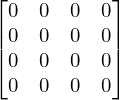

In [19]:
(θ_0 * C @ D @ C.T - R).applyfunc(sympy.simplify)

In [26]:
y_R = C.T @ dH

In [27]:
u_R = -D @ y_R

In [29]:
(J @ dH + C @ u_R).applyfunc(sympy.simplify)

⎡     υ     ⎤
⎢           ⎥
⎢A⋅(π₁ - π₂)⎥
⎢           ⎥
⎢      α⋅θ₂ ⎥
⎢ -α + ──── ⎥
⎢       θ₁  ⎥
⎢           ⎥
⎢α⋅(θ₁ - θ₂)⎥
⎢───────────⎥
⎣     θ₂    ⎦

### factorization of R

$R = \theta_0 \, C \, D \, C^\mathrm{T}$

In [31]:
D = sympy.diag(0, 0, α / θ_0, α / θ_0)

In [32]:
C = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, -sympy.sqrt(θ_2 / θ_1), 0],
    [0, 0, +sympy.sqrt(θ_1 / θ_2), 0]
])

In [33]:
C = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, +sympy.sqrt(θ_2 / θ_1)],
    [0, 0, 0, -sympy.sqrt(θ_1 / θ_2)]
])

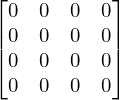

In [34]:
(θ_0 * C @ D @ C.T - R).applyfunc(sympy.simplify)

In [35]:
C.T @ dE

In [36]:
y_R = (C.T @ dH).applyfunc(sympy.simplify)
y_R

⎡      0      ⎤
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢ θ₀⋅(θ₁ - θ₂)⎥
⎢─────────────⎥
⎢  ____   ____⎥
⎣╲╱ θ₁ ⋅╲╱ θ₂ ⎦

In [37]:
u_R = -D @ y_R
u_R

⎡      0      ⎤
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢-α⋅(θ₁ - θ₂) ⎥
⎢─────────────⎥
⎢  ____   ____⎥
⎣╲╱ θ₁ ⋅╲╱ θ₂ ⎦

In [38]:
(J @ dH + C @ u_R).applyfunc(sympy.simplify)

⎡     υ     ⎤
⎢           ⎥
⎢A⋅(π₁ - π₂)⎥
⎢           ⎥
⎢      α⋅θ₂ ⎥
⎢ -α + ──── ⎥
⎢       θ₁  ⎥
⎢           ⎥
⎢α⋅(θ₁ - θ₂)⎥
⎢───────────⎥
⎣     θ₂    ⎦